In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 82)

In [6]:
X.shape[1]

82

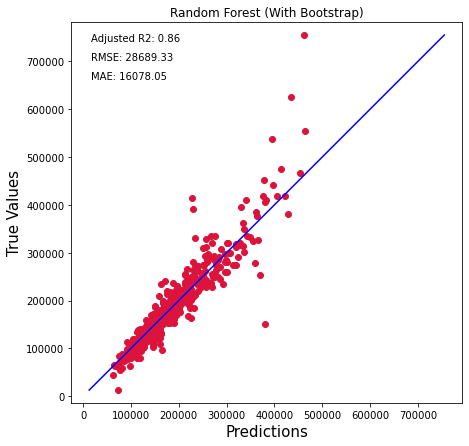

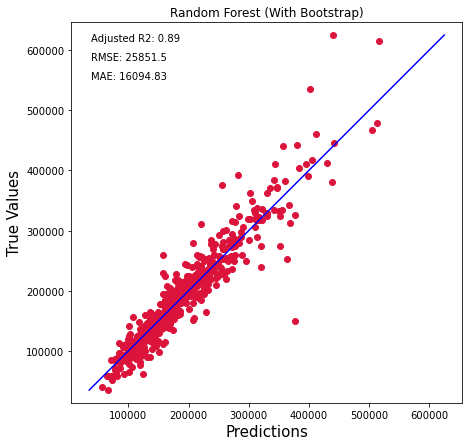

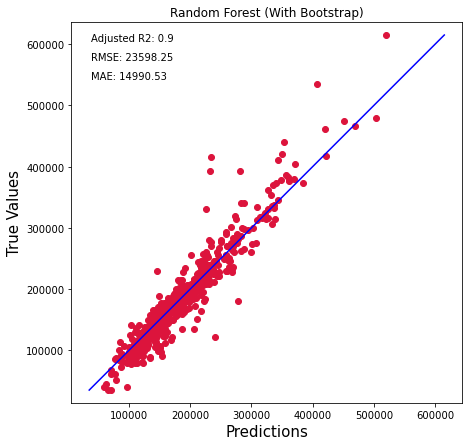

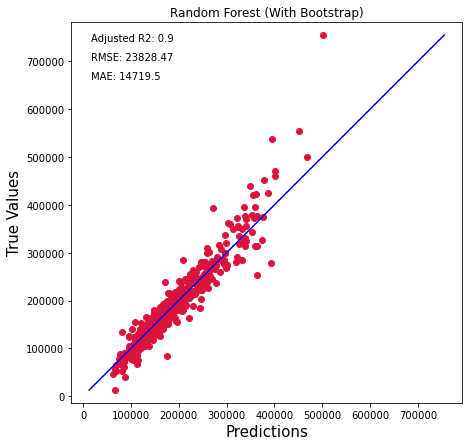

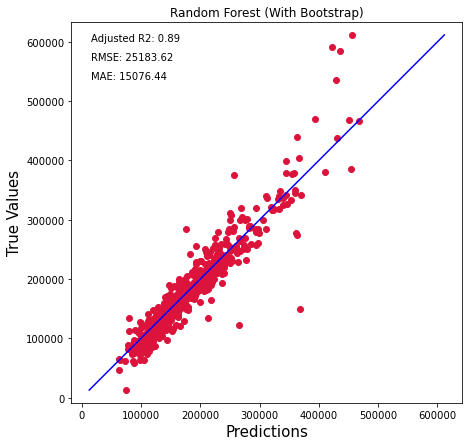

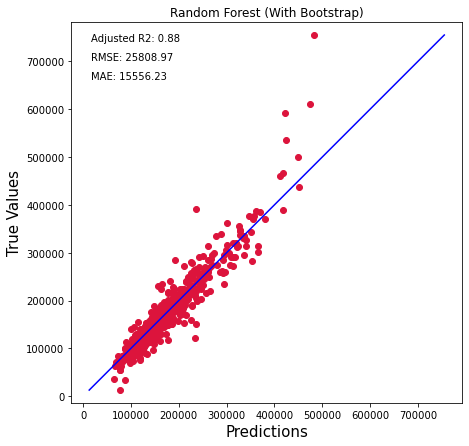

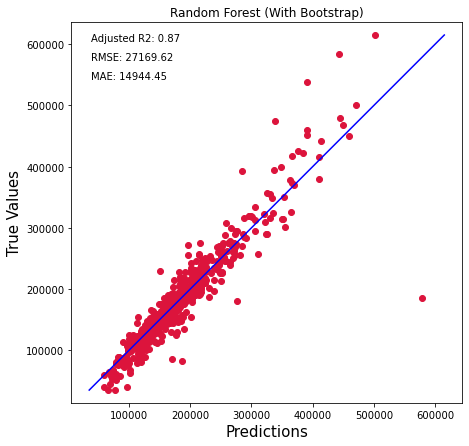

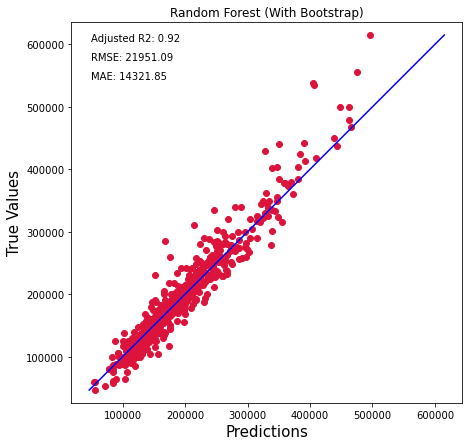

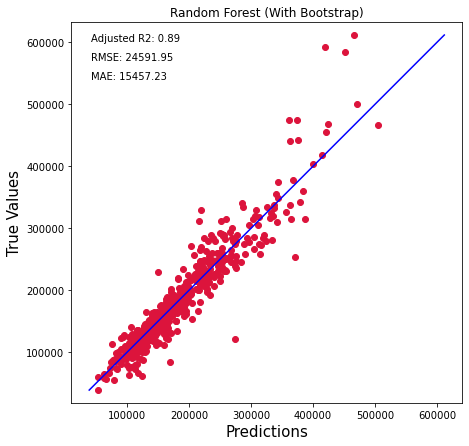

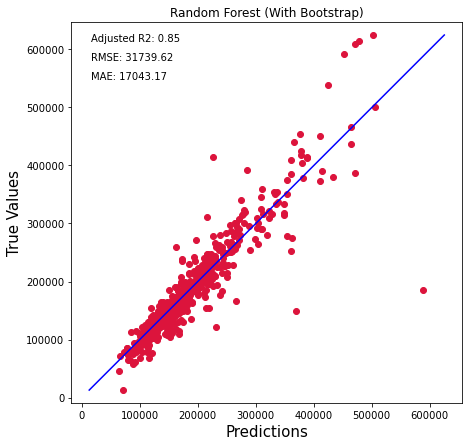

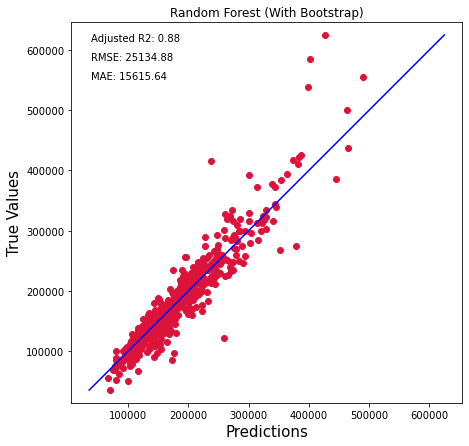

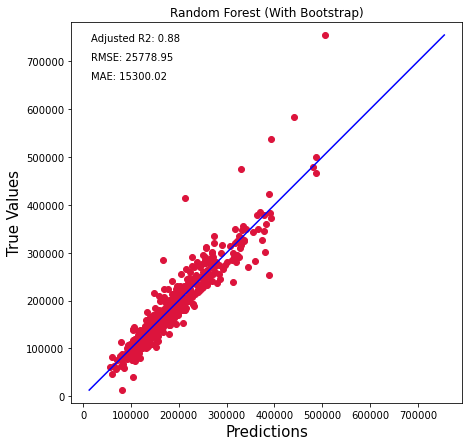

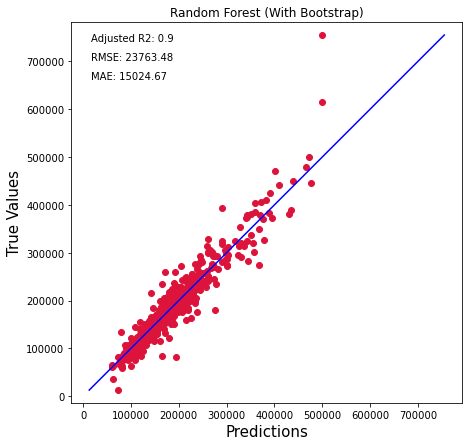

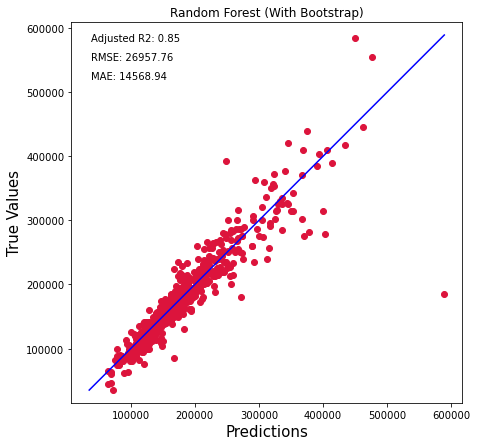

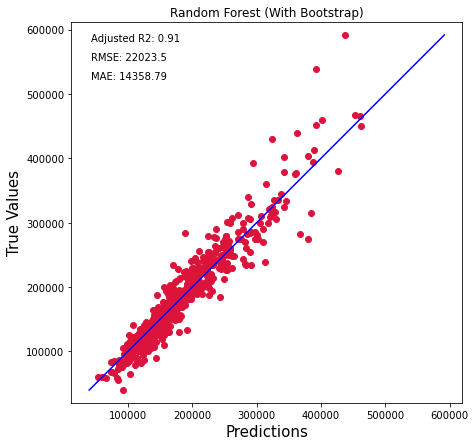

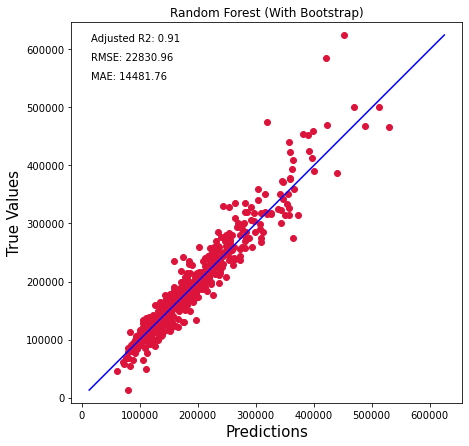

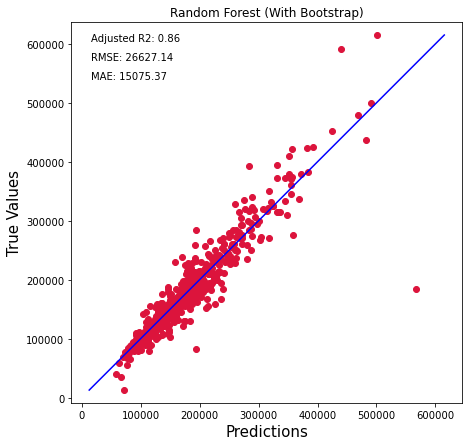

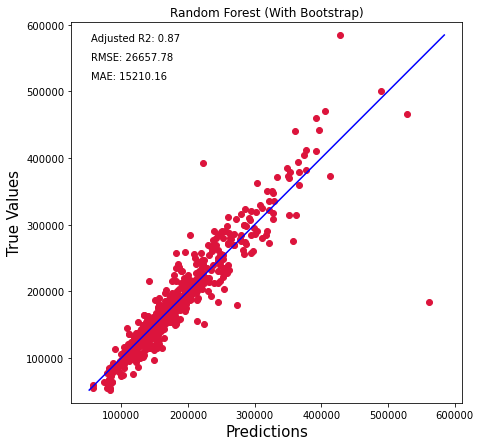

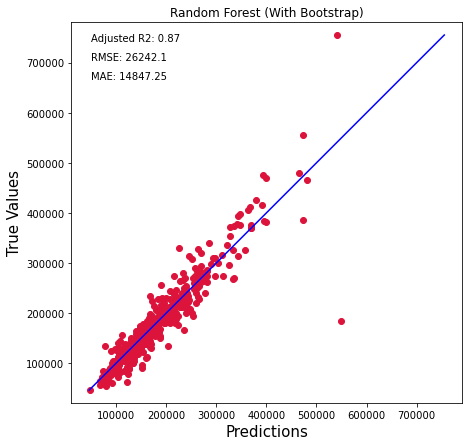

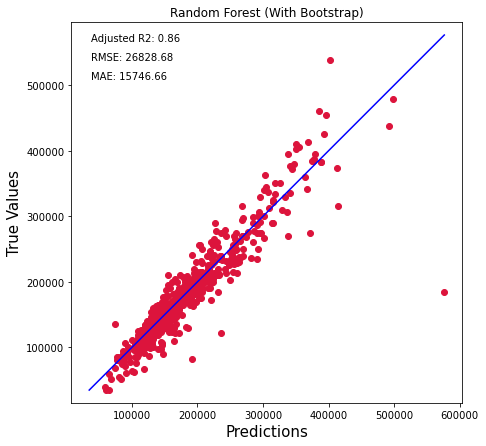

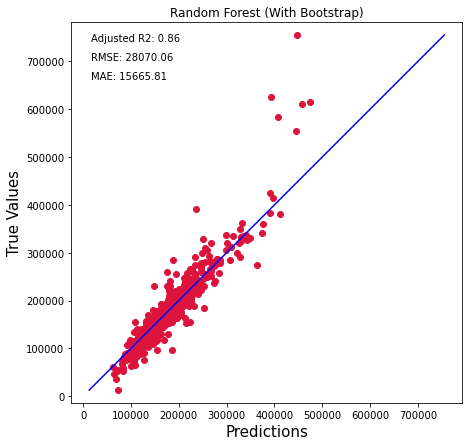

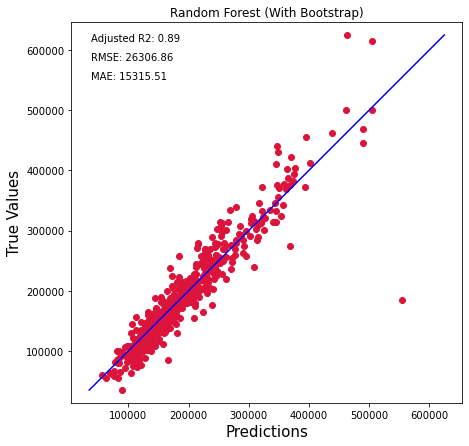

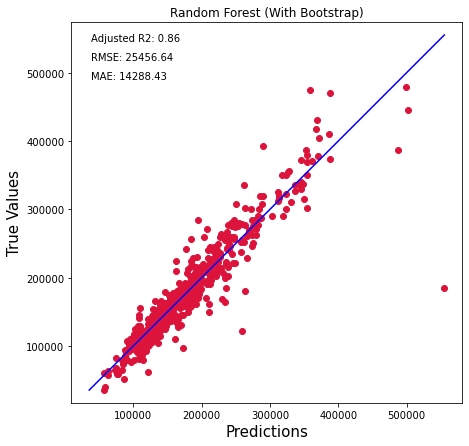

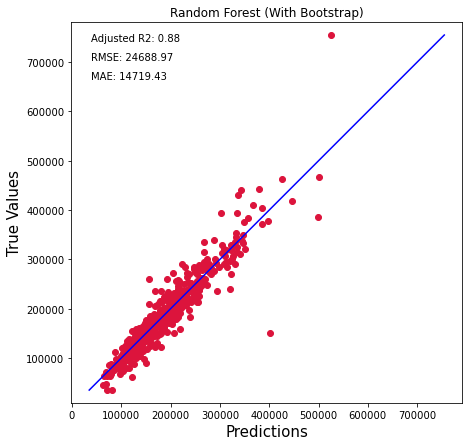

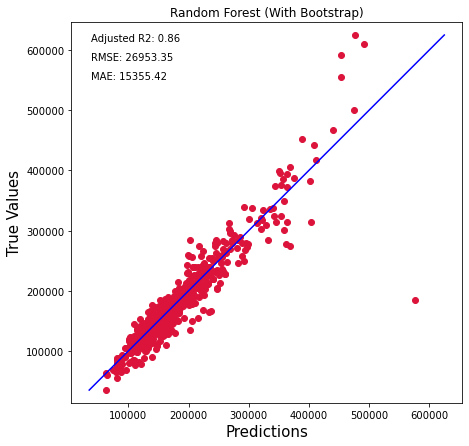

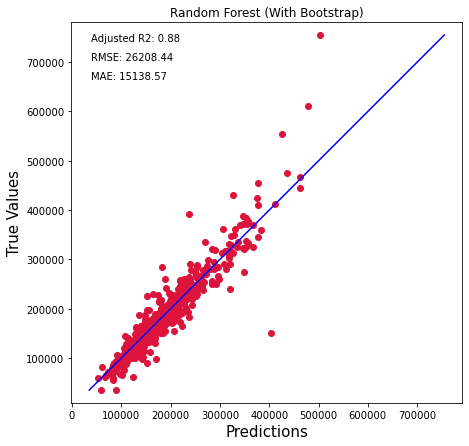

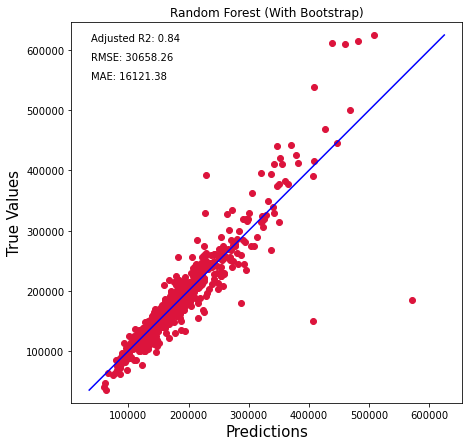

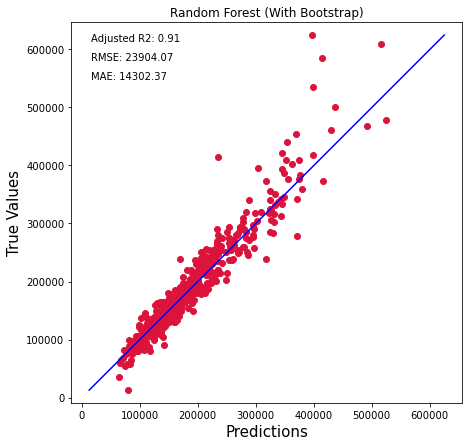

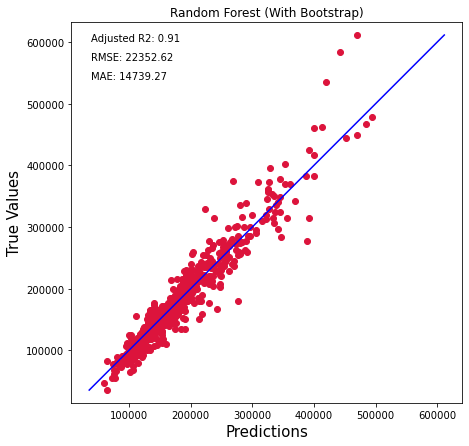

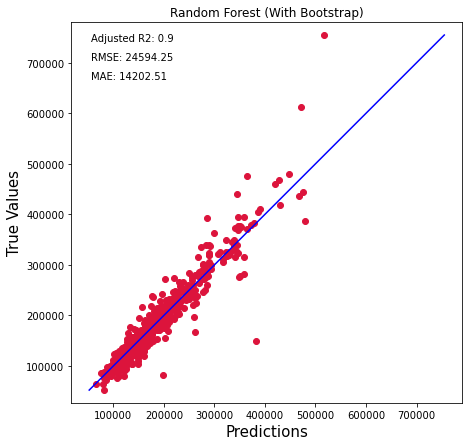

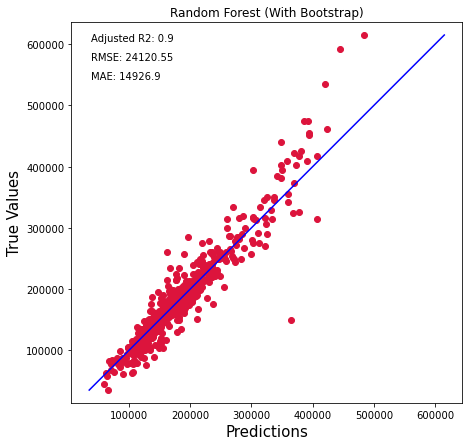

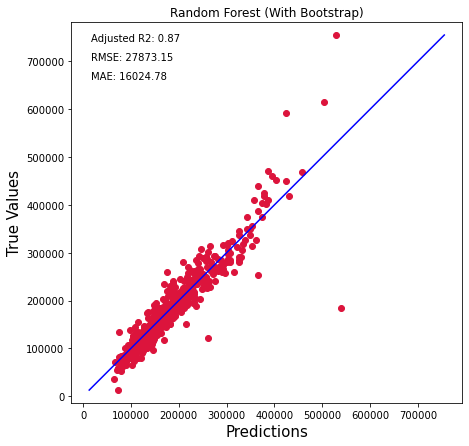

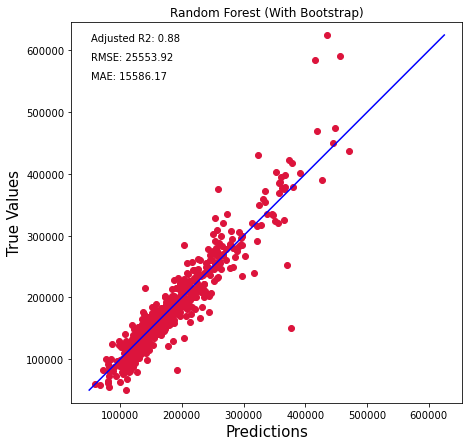

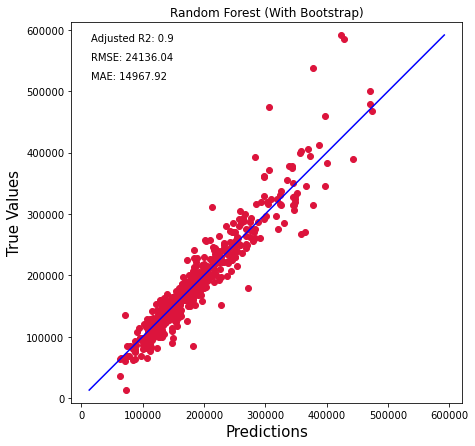

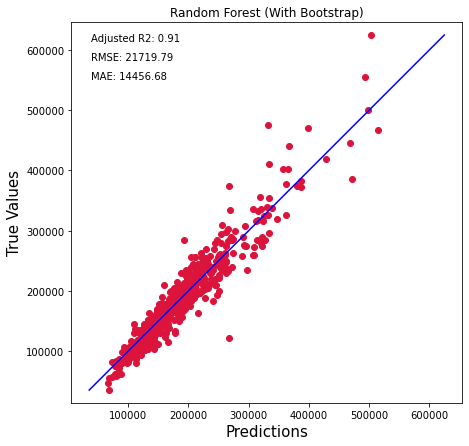

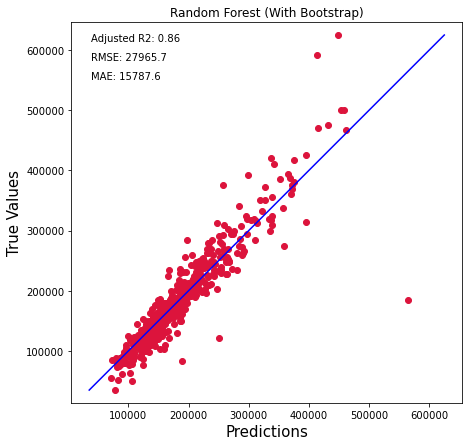

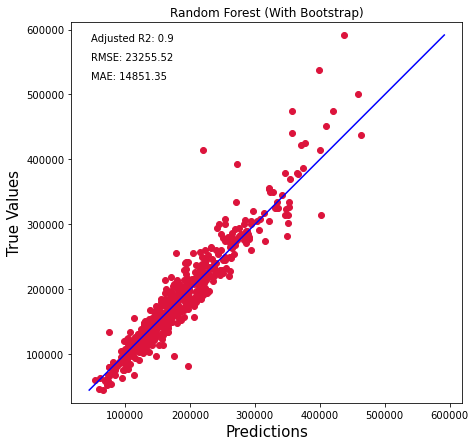

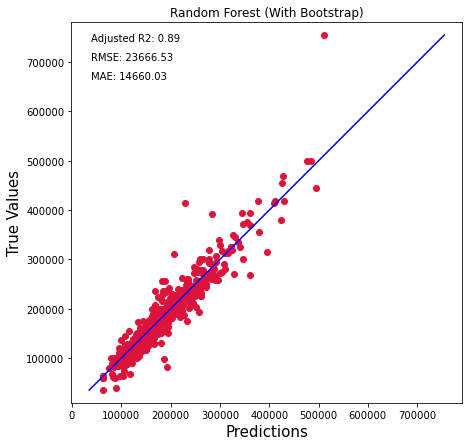

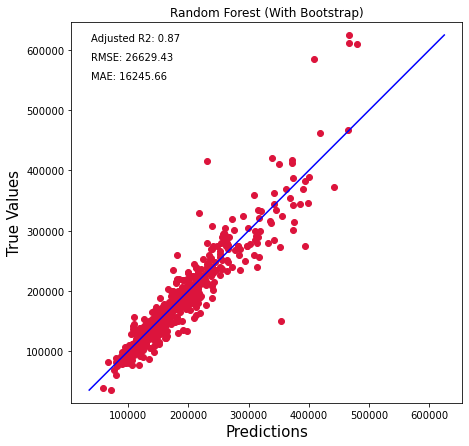

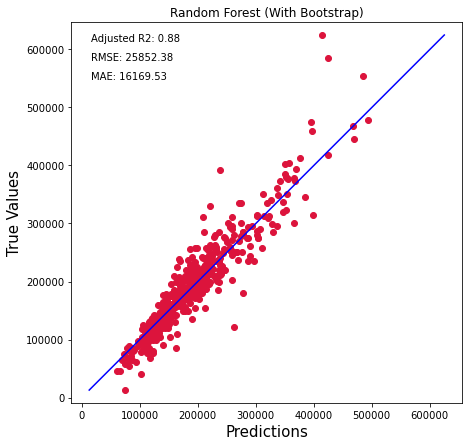

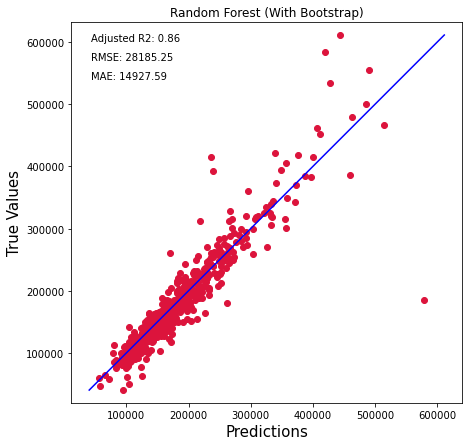

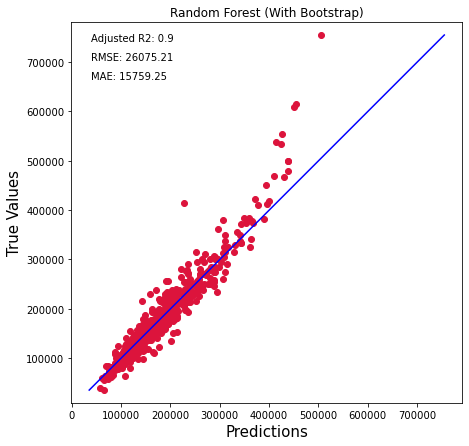

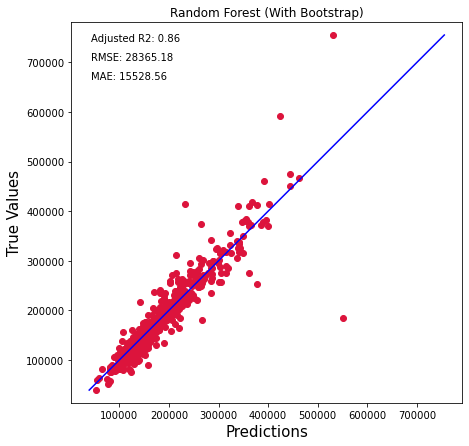

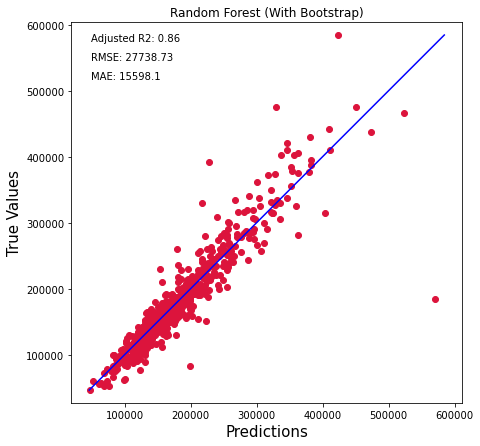

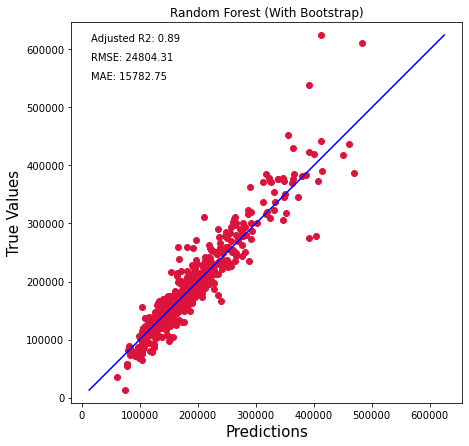

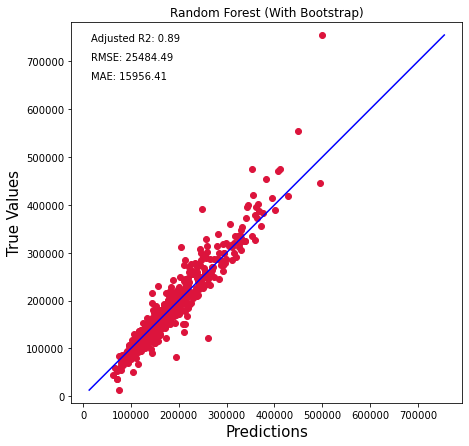

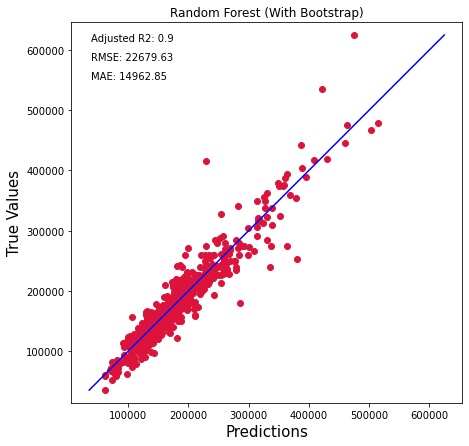

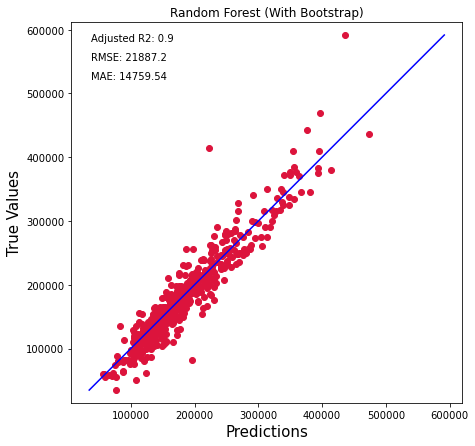

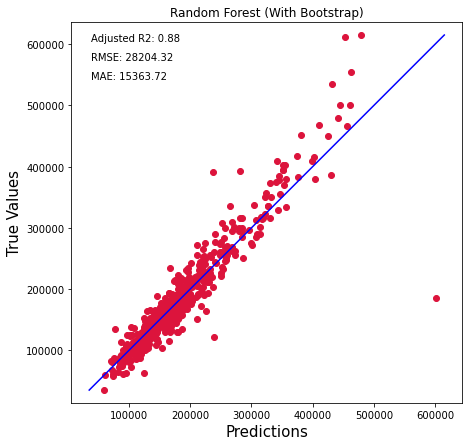

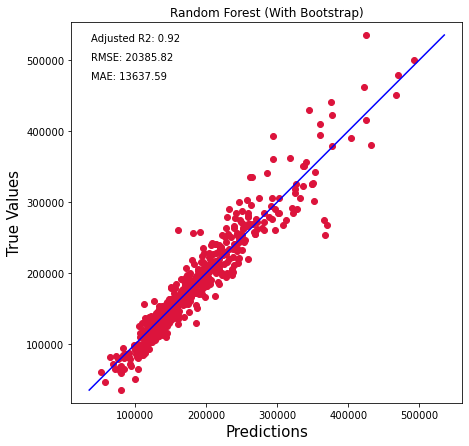

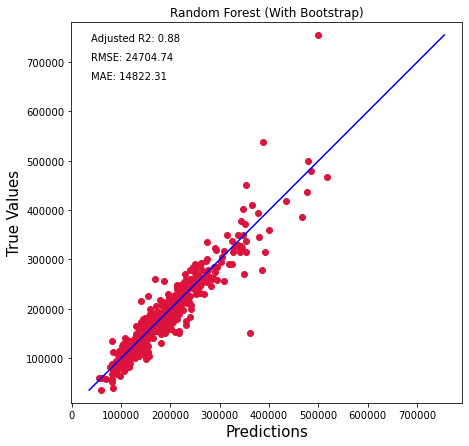

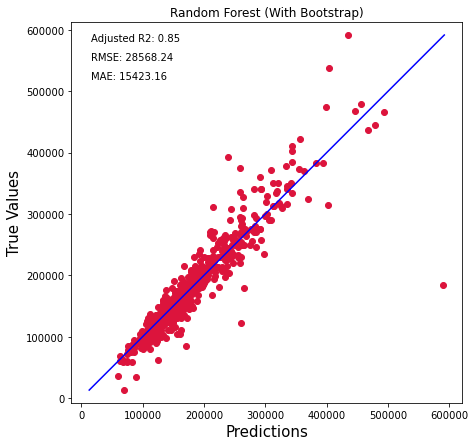

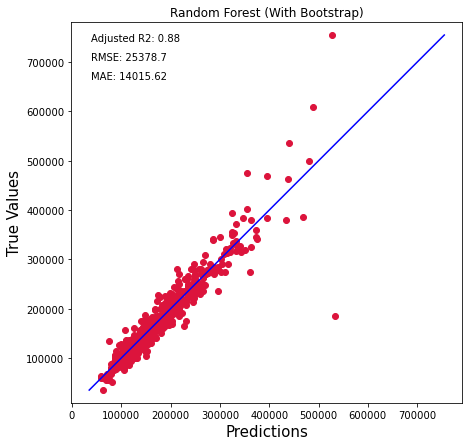

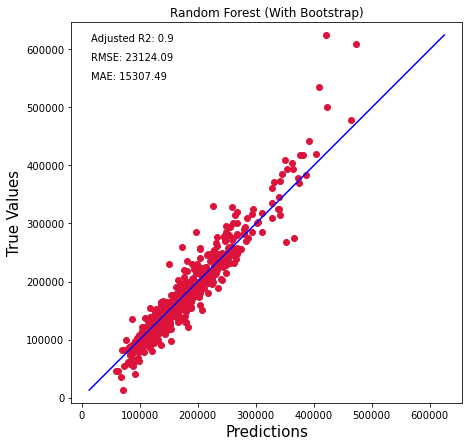

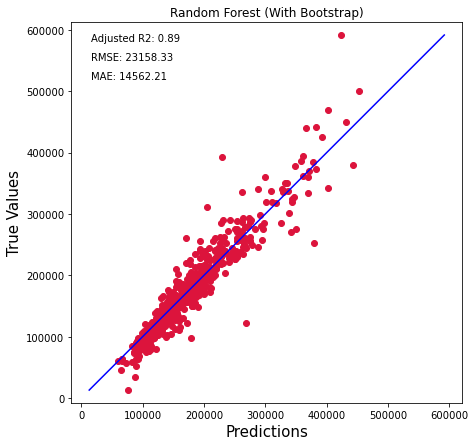

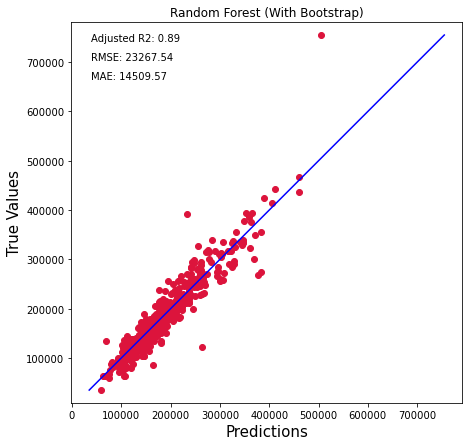

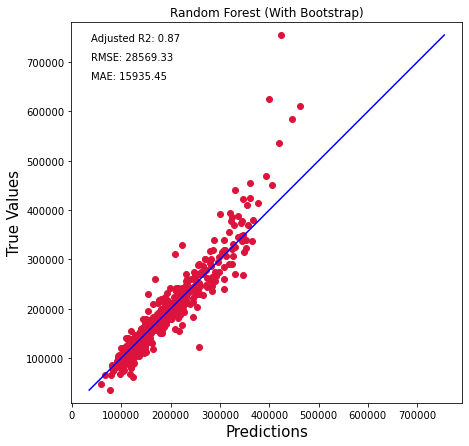

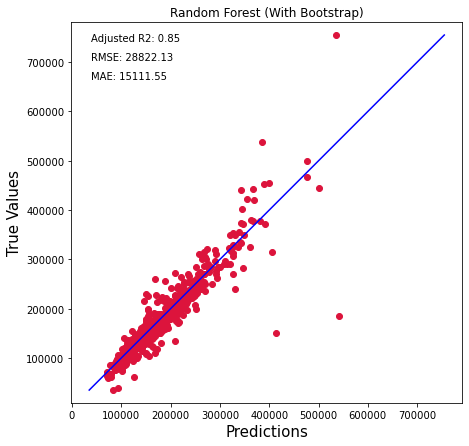

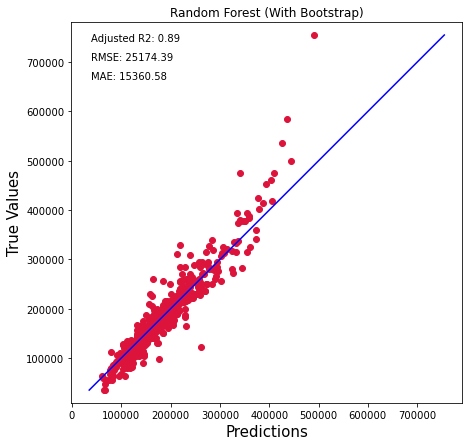

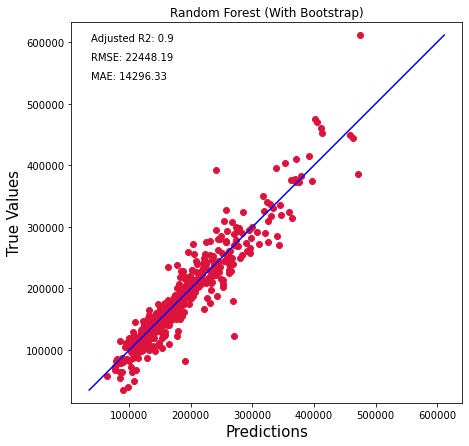

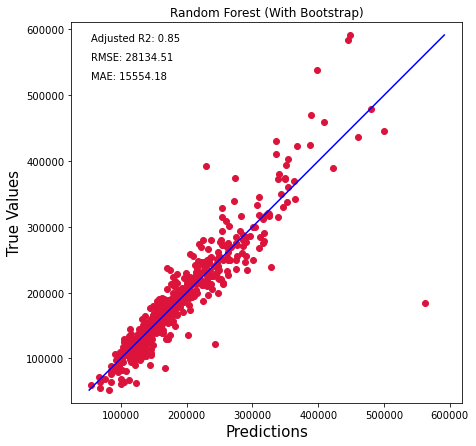

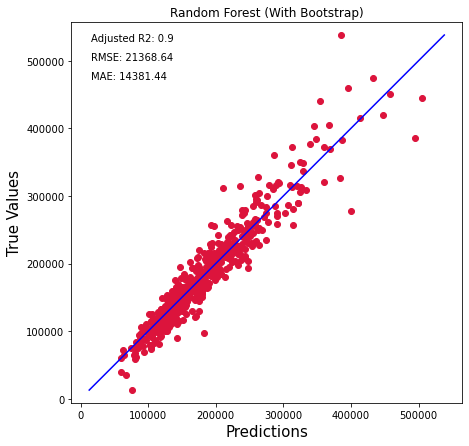

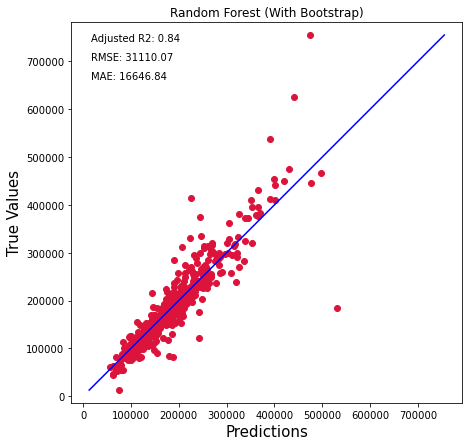

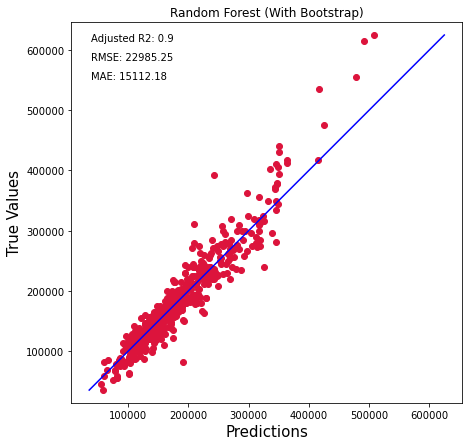

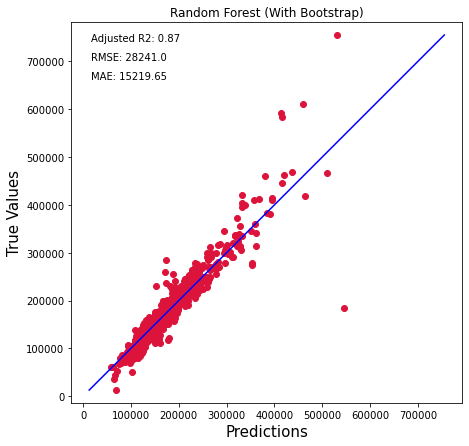

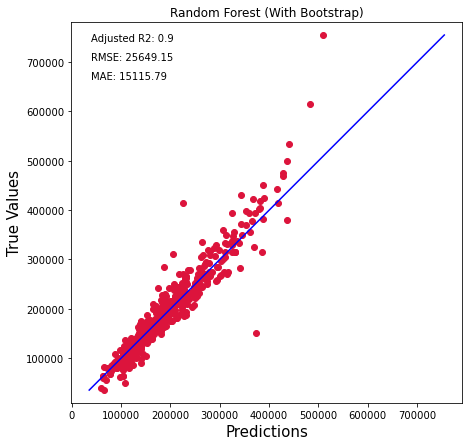

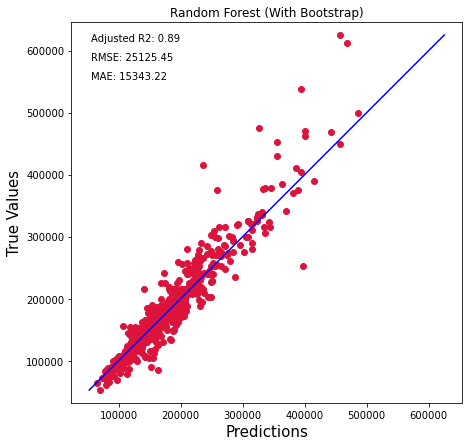

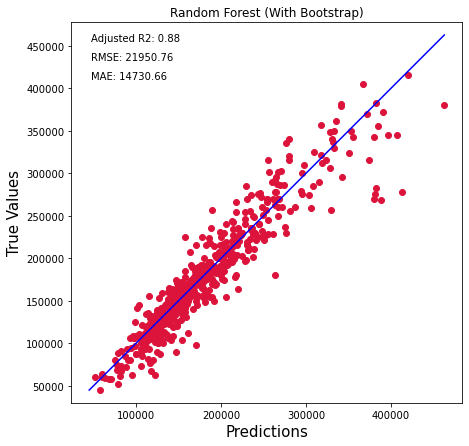

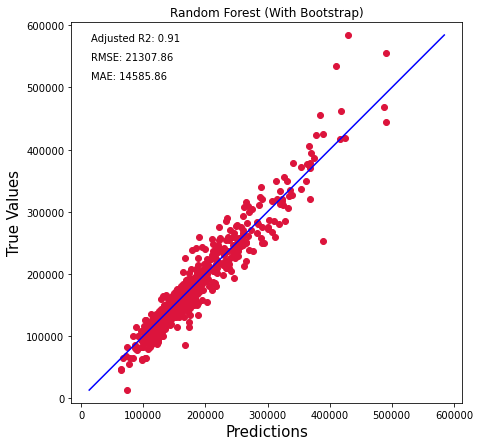

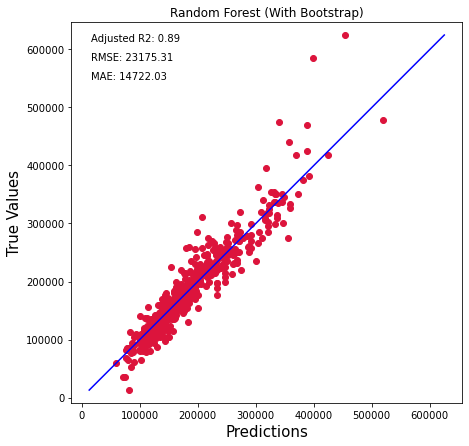

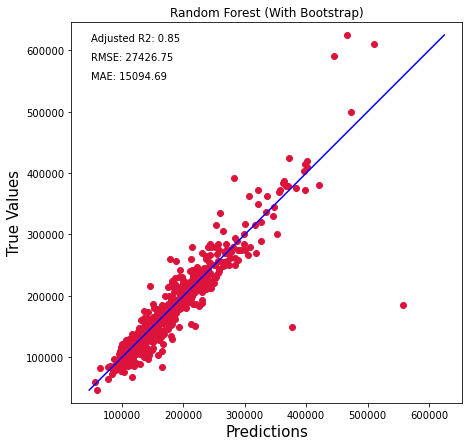

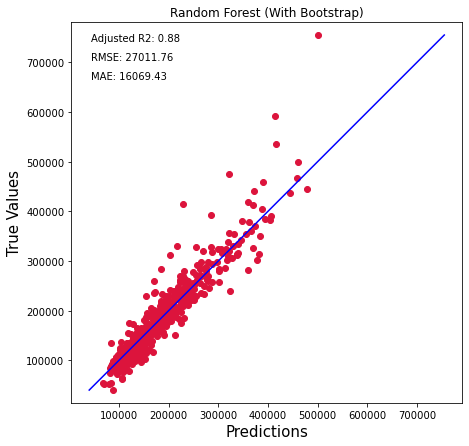

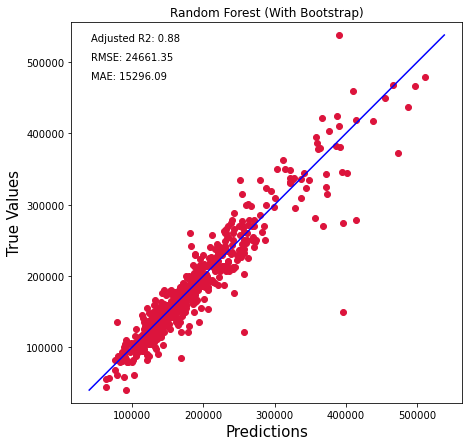

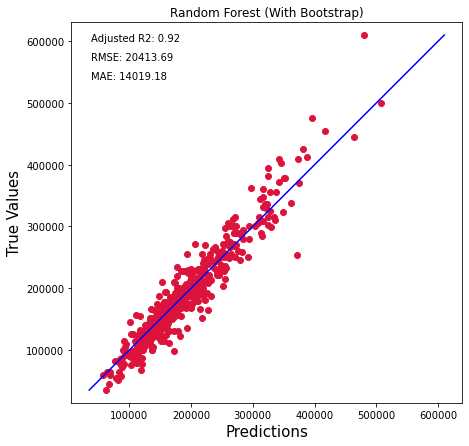

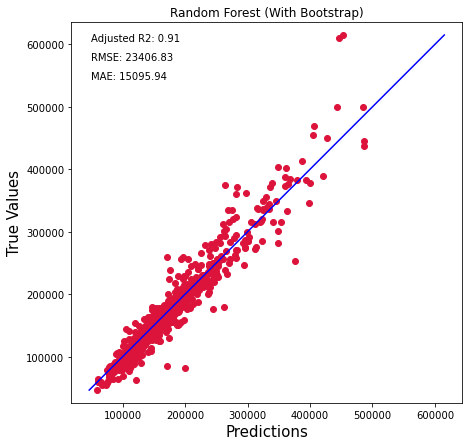

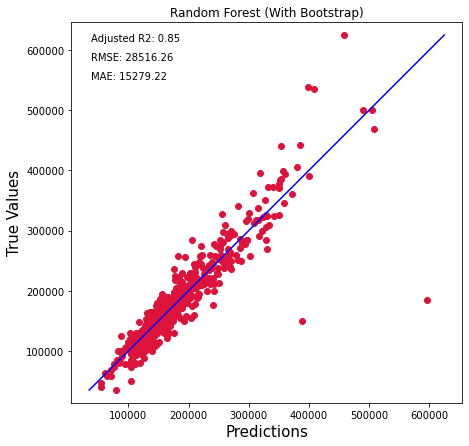

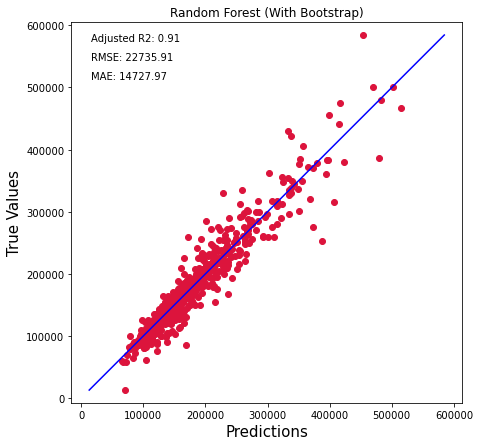

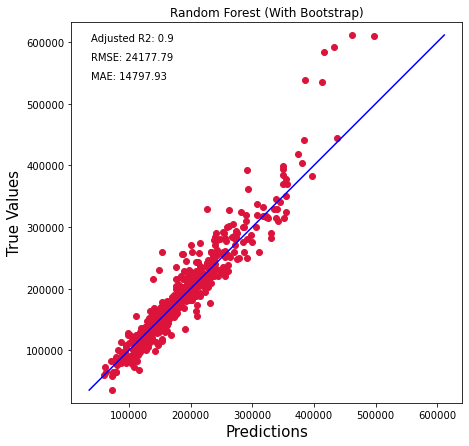

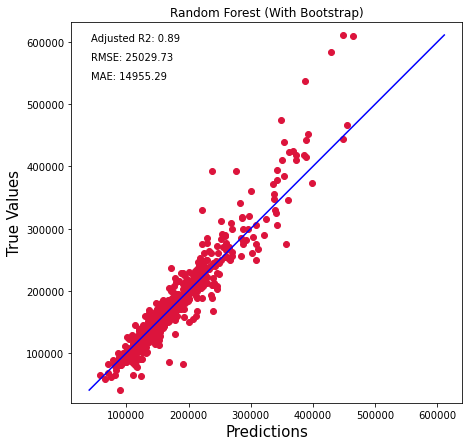

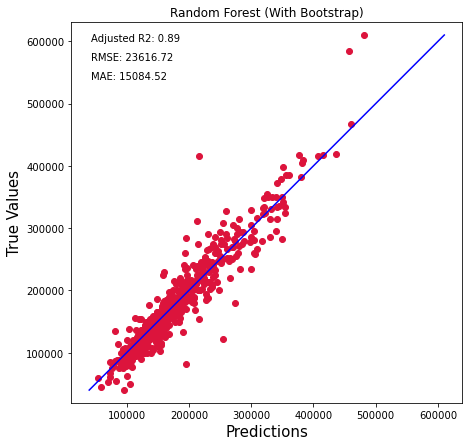

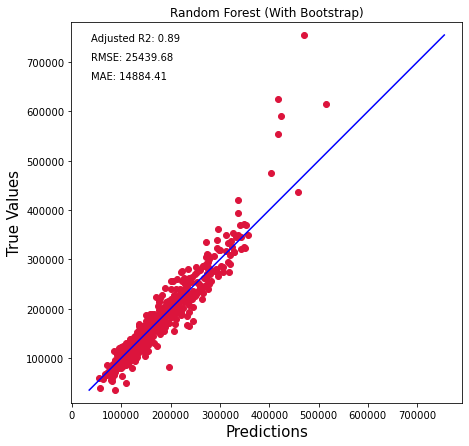

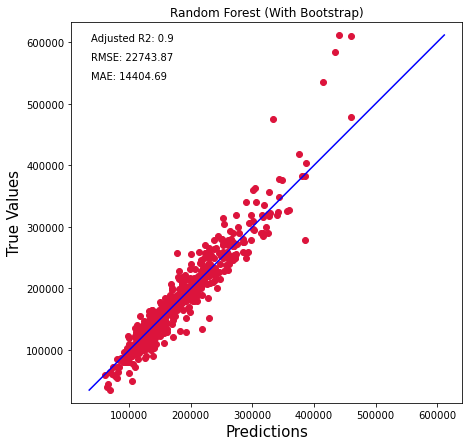

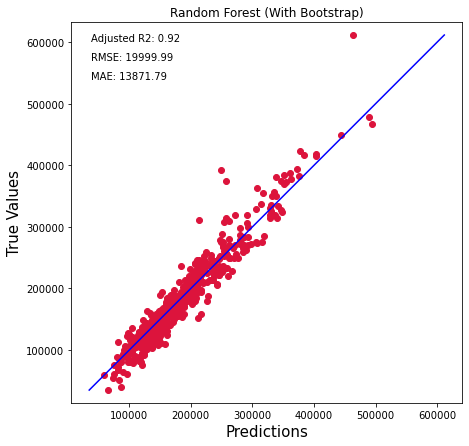

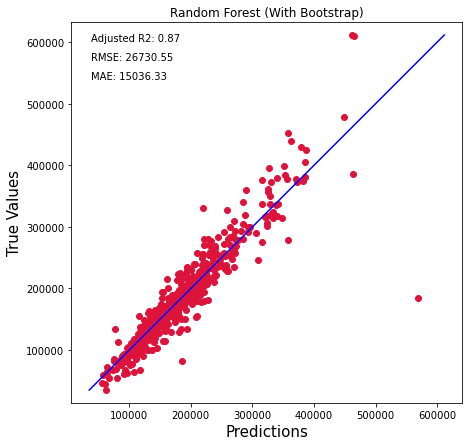

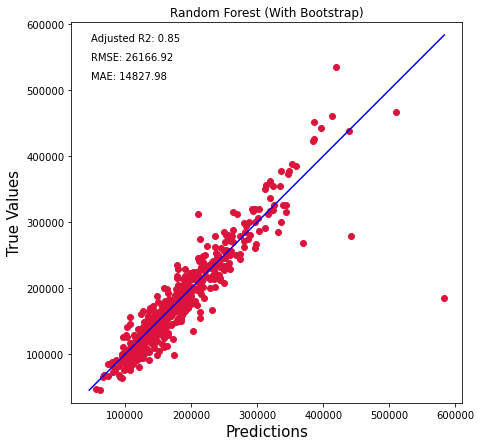

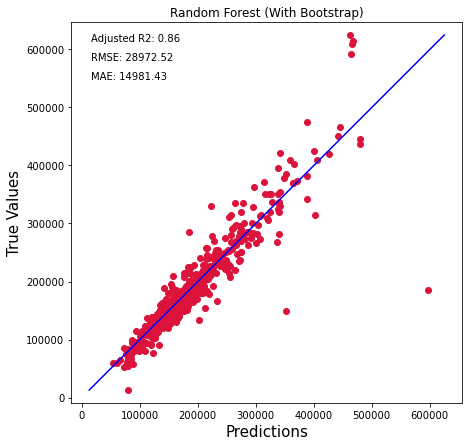

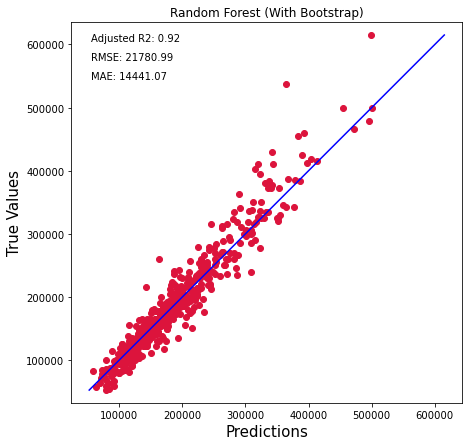

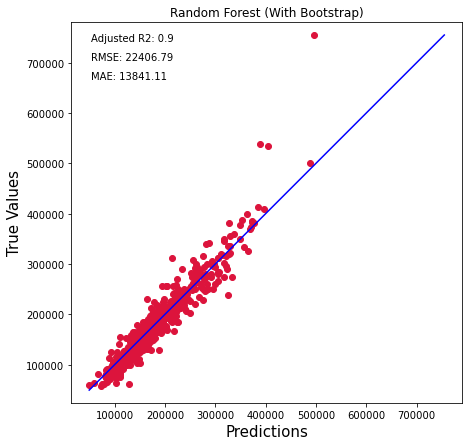

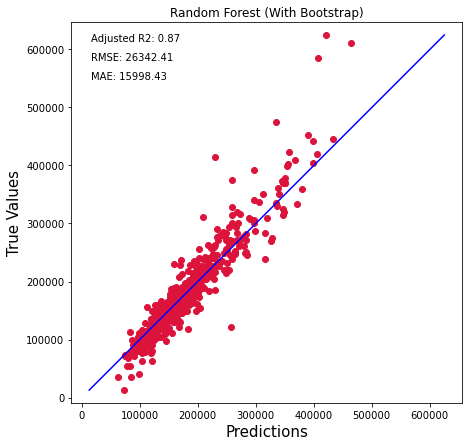

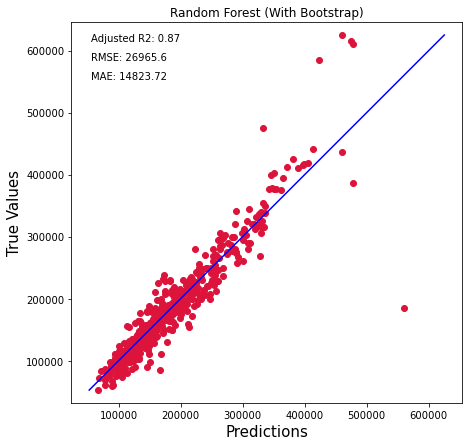

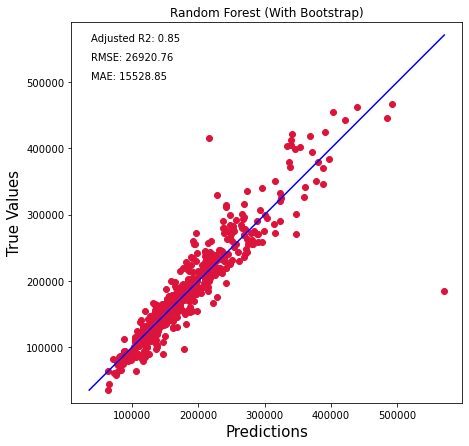

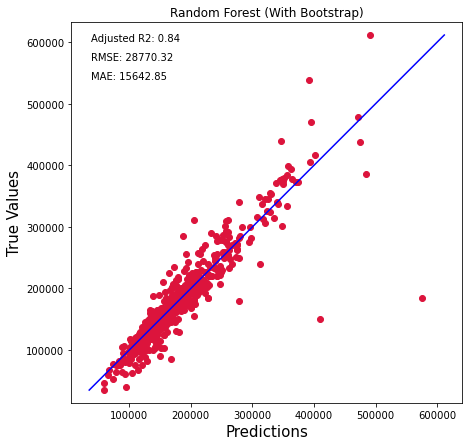

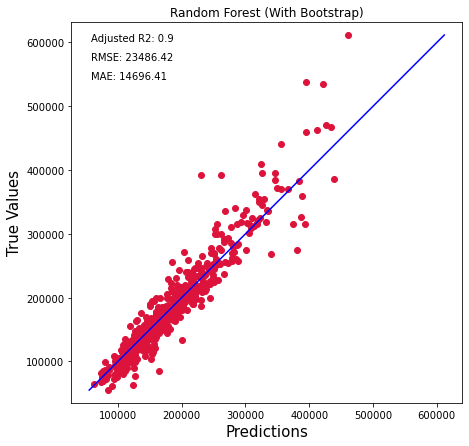

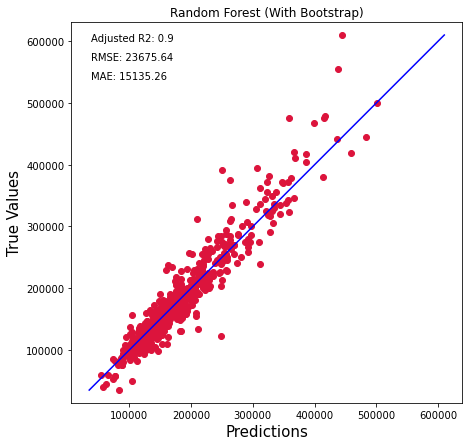

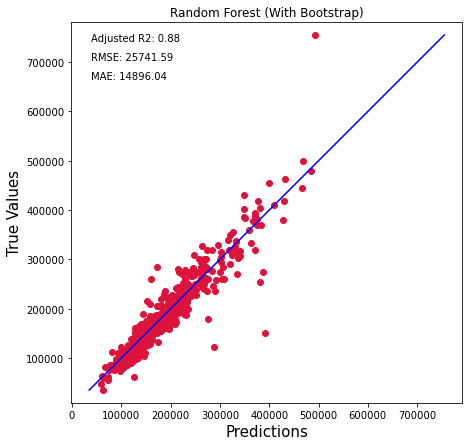

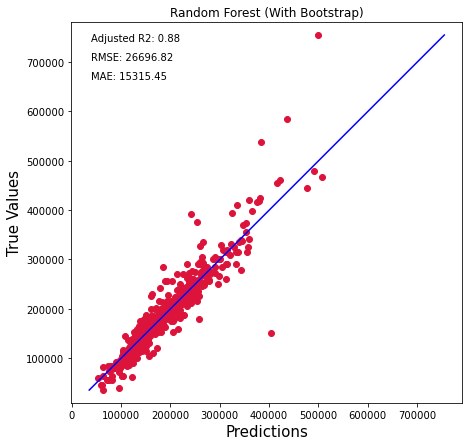

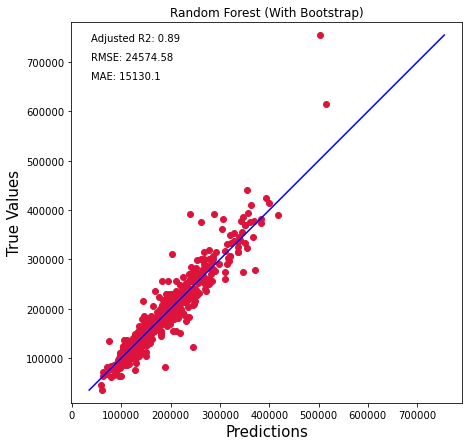

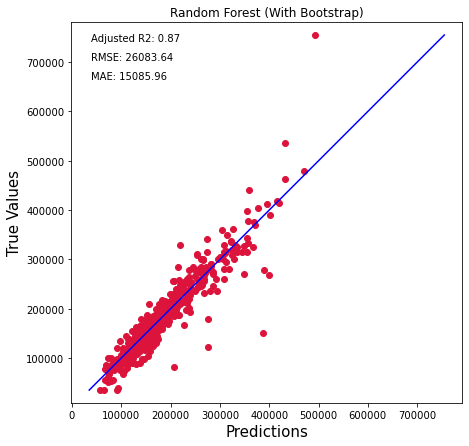

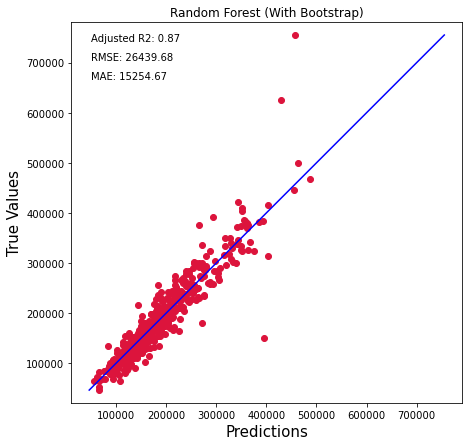

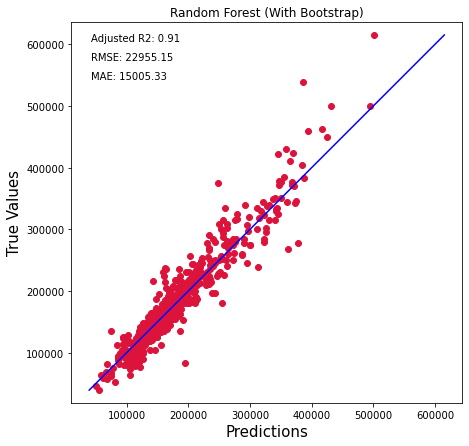

In [8]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    RF_W_Bootstrap = RandomForestRegressor(n_estimators=100, criterion='squared_error', 
                                            bootstrap=True)
    RF_W_Bootstrap.fit(X_train_scaled, Y_train)
    RF_W_Bootstrap_Score = RF_W_Bootstrap.score(X_test_scaled, Y_test)
    
    pred = RF_W_Bootstrap.predict(X_test_scaled)
    
    Scores.append(RF_W_Bootstrap_Score)
    
    Adj_r2 = 1 - (1 - RF_W_Bootstrap_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(Y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, Y_test, c='crimson')
    
    plt.title('Random Forest (With Bootstrap)')
    p1 = max(max(pred), max(Y_test))
    p2 = min(min(pred), min(Y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    

In [9]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [10]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
0,0.865276,0.860852,8.230777e+08,28689.330385,16078.050760
1,0.894882,0.891430,6.683001e+08,25851.500164,16094.827783
2,0.903334,0.900160,5.568773e+08,23598.248151,14990.530062
3,0.906675,0.903610,5.677958e+08,23828.466712,14719.503364
4,0.890777,0.887190,6.342148e+08,25183.621954,15076.437504
5,0.886654,0.882931,6.661031e+08,25808.973454,15556.226558
6,0.878739,0.874757,7.381885e+08,27169.623721,14944.447411
7,0.926741,0.924335,4.818502e+08,21951.087468,14321.847953
8,0.897230,0.893855,6.047641e+08,24591.951479,15457.225488
9,0.850760,0.845859,1.007404e+09,31739.623782,17043.168884


In [17]:
combo.to_csv('RF_W_BS.csv', index=False)

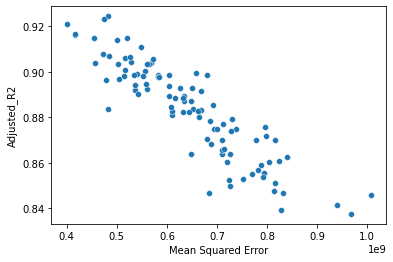

In [11]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

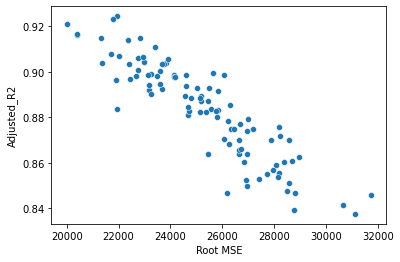

In [12]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

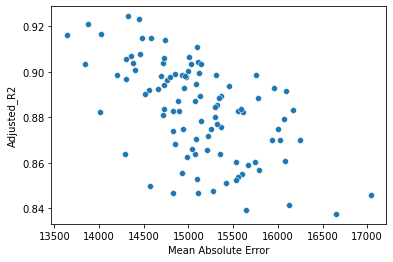

In [13]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

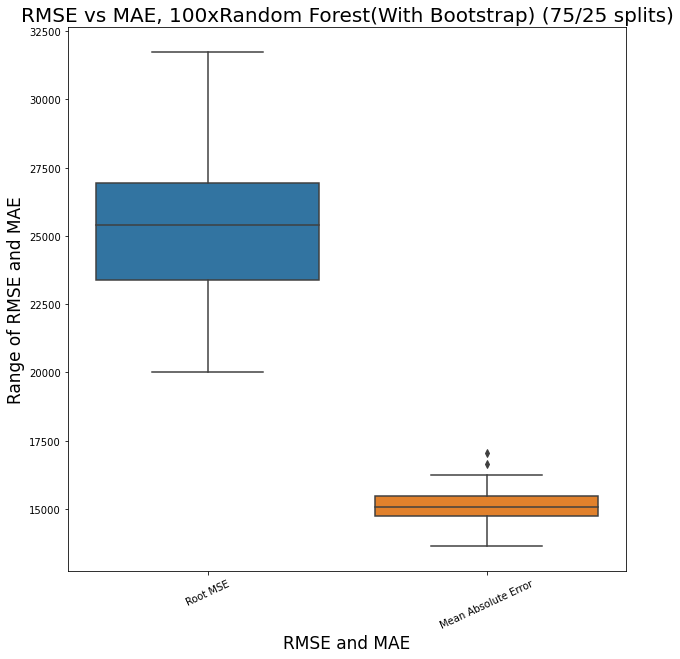

In [14]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xRandom Forest(With Bootstrap) (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

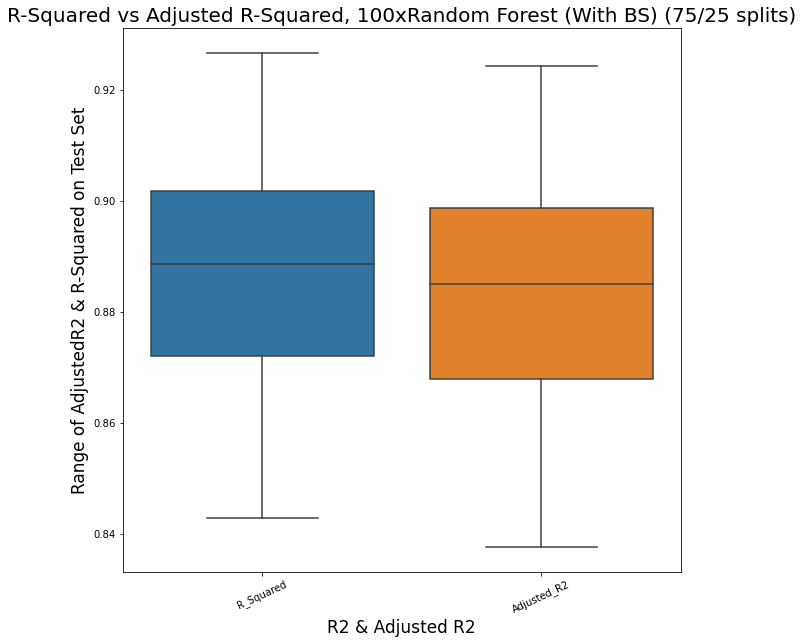

In [15]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xRandom Forest (With BS) (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=combo[['R_Squared', 'Adjusted_R2']])
plt.xticks(rotation=25);

In [16]:
combo.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,0.887075,0.883367,6.445743e+08,25271.886997,15102.914530
std,0.020408,0.021079,1.244970e+08,2442.485068,613.832604
min,0.842776,0.837613,3.999998e+08,19999.994566,13637.591488
25%,0.872065,0.867863,5.462543e+08,23372.006628,14726.489326
50%,0.888687,0.885032,6.456280e+08,25409.192720,15080.478744
75%,0.901867,0.898645,7.251664e+08,26928.909932,15475.059295
max,0.926741,0.924335,1.007404e+09,31739.623782,17043.168884
